# Лабораторная работа №4 по машинному обучению
## Выполнил студент группы 19-ИВТ-3 Зорин Д.А.
## Вариант 17
## Цель лабораторной работы – получение навыков работы с методами классификации.
## energy
## Классификаторы 1,3

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import warnings
warnings.simplefilter('ignore')
from pylab import rcParams



## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

1. data - дата время год-месяц-день час: минута: секунда
2. appliances - Приборы, использование энергии в ватт-часах
3. lights - Свет, энергопотребление осветительных приборов в доме в ватт-часах
4. T1 - Температура на кухне, в градусах Цельсия
5. RH_1 - Влажность на кухне, в %
6. T2 - Температура в гостиной, в градусах Цельсия
7. RH_2 - Влажность в гостиной, в %
8. T3 - Температура в прачечной, в градусах Цельсия
9. RH_3 - Влажность в прачечной, в %
10. T4 - Температура в офисе, в градусах Цельсия
11. RH_4 - Влажность в офисном помещении, в %
12. T5 - Температура в ванной, в градусах Цельсию
13. RH_5 - Влажность в ванной, в %
14. T6 - Температура снаружи здания (северная сторона), по Цельсию
15. RH_6 - Влажность вне здания (северная сторона), в %
16. T7 - Температура в гладильной комнате, в градусах Цельсия
17. RH_7 - Влажность в гладильной комнате, в %
18. T8 - Температура в комнате для подростков 2, в градусах Цельсия
19. RH_8 - Влажность в комнате подростка 2, в %
20. T9 - Температура в комнате родителей, в градусах Цельсия
21. RH_9 - Влажность в комнате родителей, в %
22. T_out - Температура снаружи, по Цельсию
23. Pressure - Давление, мм рт.
24. RH_out - Влажность снаружи, в %
25. Wind speed - Скорость ветра, м / с
26. Visibility - Видимость, км
27. Tdewpoint - температура точки росы, ° C
28. rv1 - Случайная переменная 1, безразмерная
29. rv2 - Случайная переменная 2, безразмерная         Среда обитания

## 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [5]:
df.shape

(19735, 29)

In [6]:
df = df.drop_duplicates()
df.shape

(19735, 29)

## 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

Numerical: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


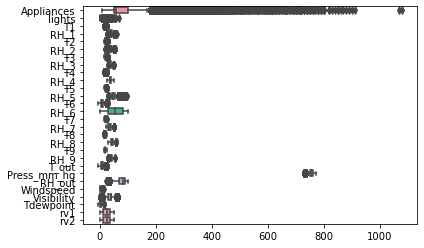

In [7]:
numer_columns = [i for i in df.columns if df[i].dtype.name != 'object']
print("Numerical: " + str(numer_columns))
sns.boxplot(data = df, orient = 'h')
plt.show()

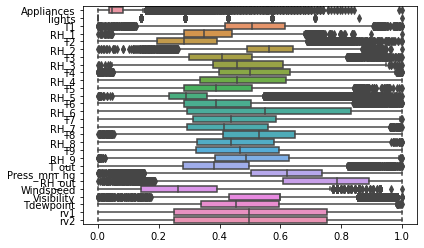

In [8]:
#нормализация

scal = preprocessing.MinMaxScaler()

df[numer_columns] = scal.fit_transform(df[numer_columns])

sns.boxplot(data=df[numer_columns], orient="h")

plt.show()

## 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [9]:
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1720
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1395
rv1            19735
rv2            19735
dtype: int64

In [10]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print (f"Категориальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категориальные признаки: ['date']
Числовые признаки: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [11]:
#замена не требуется, т.к. в наборе данных все значения уникальные.
df[categorical_columns].describe()

,date
count,19735
unique,19735
top,2016-03-12 13:30:00
freq,1


## 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

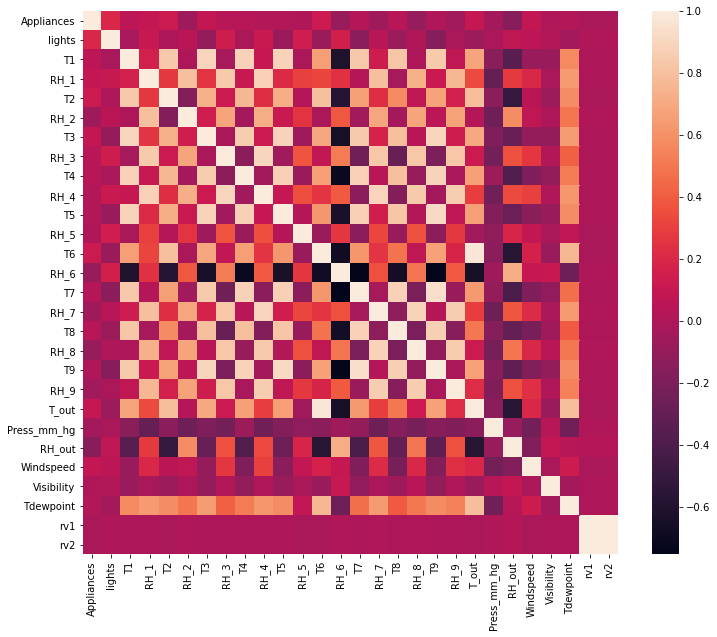

In [12]:
plt.rcParams["figure.figsize"]= 12, 10
df_corr = df.corr()
sns.heatmap(df_corr)

## 6. Заполните пропущенные значения в данных

In [13]:
#не требуется, но если было бы необходимо, то:
df = df.fillna(0)

## 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [14]:
#Линейная регрессия без использования регуляризаторов
df.drop(['date'], axis = 1, inplace=True)

In [15]:
data_x = df.drop(['T1'], axis = 1)
data_y = df['T1']
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 0)
l_r = LinearRegression()
l_r.fit(X_train, y_train)
pred = l_r.predict(X_test)

print(pred[:10] - y_test[:10])

15563    0.016649
12564   -0.020197
10649    0.000880
16554   -0.028204
8130     0.022635
16981    0.005246
8164     0.003807
14583   -0.023842
18716   -0.031759
18643    0.004675
Name: T1, dtype: float64


In [16]:
person, pvalue = pearsonr(pred, y_test)
print("Корреляция Пирсона.: ", person)
print("p_value:", pvalue)
spermen, pvalue = spearmanr(pred, y_test)
print("Корреляция Спирмена: ", spermen)
print("p_value:", pvalue)

Корреляция Пирсона.:  0.9741058393908819
p_value: 0.0
Корреляция Спирмена:  0.967345099791663
p_value: 0.0


In [17]:
#Линейная регрессия, RIDGE регуляризатор
rid = Ridge()
parameters_rid = {'alpha': np.linspace(1, 5, 25)}
grid_rid = GridSearchCV(rid, parameters_rid) 
grid_rid = grid_rid.fit(X_train, y_train)
alpha = grid_rid.best_estimator_.alpha
rid = Ridge(alpha = alpha)
rid.fit(X_train, y_train)
pred = rid.predict(X_test)
print(pred[:10] - y_test[:10])

15563    0.018657
12564   -0.018571
10649   -0.005999
16554   -0.036437
8130     0.020982
16981    0.004431
8164     0.004609
14583   -0.025743
18716   -0.027555
18643    0.007635
Name: T1, dtype: float64


In [18]:
person, pvalue = pearsonr(pred, y_test)
print("Корреляция Пирсона.: ", person)
print("p_value:", pvalue)
spermen, pvalue = spearmanr(pred, y_test)
print("Корреляция Спирмена: ", spermen)
print("p_value:", pvalue)

Корреляция Пирсона.:  0.9739774922485278
p_value: 0.0
Корреляция Спирмена:  0.9668624702824232
p_value: 0.0
